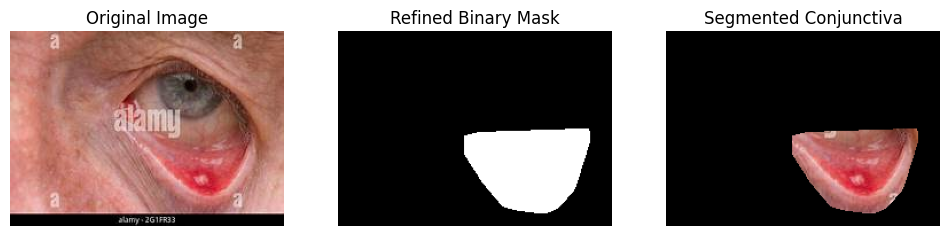

In [101]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = r"C:\Users\LOQ\Pictures\5.jpeg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)

a_channel = lab[:, :, 1]
thresh_val, binary_mask = cv2.threshold(a_channel, 156, 255, cv2.THRESH_BINARY)
binary_mask = cv2.GaussianBlur(binary_mask, (5, 5), 0)

kernel = np.ones((5, 5), np.uint8)
clean_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_OPEN, kernel)
clean_mask = cv2.morphologyEx(clean_mask, cv2.MORPH_CLOSE, kernel)

height, width = clean_mask.shape
lower_half_mask = np.zeros_like(clean_mask)
lower_half_mask[int(height * 0.5):, :] = 255  
focused_mask = cv2.bitwise_and(clean_mask, lower_half_mask)

contours, _ = cv2.findContours(focused_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    refined_mask = np.zeros_like(focused_mask)
    cv2.drawContours(refined_mask, [cv2.convexHull(largest_contour)], -1, 255, thickness=cv2.FILLED)
else:
    refined_mask = focused_mask

segmented_conjunctiva = cv2.bitwise_and(image, image, mask=refined_mask)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(refined_mask, cmap='gray')
axes[1].set_title("Refined Binary Mask")
axes[1].axis("off")

axes[2].imshow(segmented_conjunctiva)
axes[2].set_title("Segmented Conjunctiva")
axes[2].axis("off")

plt.show()